# TP1 : Simulation de l'instabilité de Kelvin-Helmholtz

**Université Paris-Saclay, M1 MFL, MNMF**

Nom, Prénom = ...

#### 🔥🔥🔥 Consignes 🔥🔥🔥

Rédiger votre compte rendu directement dans ce notebook Jupyter. Toute forme de collaboration est **fortement encouragée**, mais **le copié-collé ne sera pas toléré**. Le compte rendu sera à déposer sur eCampus.

## 1. Introduction

L'atmosphère est constituée de plusieurs couches d'air, qui peuvent parfois bouger en strates comme marqué dans la figure ci-dessous. 

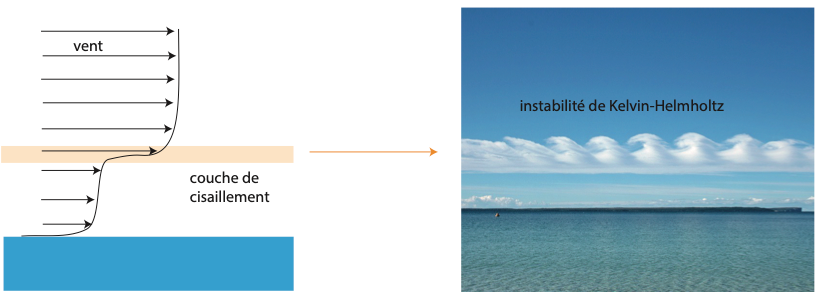

Le profil de vitesse varie selon la hauteur et peut parfois changer très rapidement dans ce qui s'appelle une couche de cisaillement, couche de vorticité ou couche de mélange. Sous l'effet de l'instabilité de Kelvin-Helmholtz, cette couche peut se déstabiliser pour ainsi former une allée tourbillonnaire, ici visualisée avec  des nuages qui sont advectés par les tourbillons. Dans ce TP, on propose d'étudier numériquement cette instabilité à l'aide de la méthode des différences finies. 


## 2. Problème continu

### 2.1. Formulation primitive, dimensionnée

Le fluide est incompressible, de densité $\rho$ et de viscosité cinématique $\nu$. On ignore la gravité et on suppose qu'aucune autre force agit sur le fluide. On note $\vec{u} = u_x \vec{e}_x + u_y \vec{e}_y$ le champ de vitesse en 2D et $p$ la pression. Conservation de quantité de mouvement et de masse indiquent alors que

\begin{eqnarray}
\frac{\partial u_x}{\partial t}  + u_x \frac{\partial u_x}{\partial x} + u_y \frac{\partial u_x}{\partial y}   &=&  - \frac{1}{\rho} \frac{\partial p}{\partial x} + \nu   \left ( \frac{\partial^2 u_x}{\partial x^2}  + \frac{\partial^2 u_x}{\partial y^2}  \right )  \\
\frac{\partial u_y}{\partial t}  + u_x \frac{\partial u_y}{\partial x} + u_y \frac{\partial u_y}{\partial y}   &=&  - \frac{1}{\rho} \frac{\partial p}{\partial y} + \nu   \left ( \frac{\partial^2 u_y}{\partial x^2}  + \frac{\partial^2 u_y}{\partial y^2}  \right )  \\
\frac{\partial u_x}{\partial x}  + \frac{\partial u_y}{\partial y} & = & 0  
\end{eqnarray}

On résout ces équations pour $t\in [0,T_f]$, dans un domaine rectangulaire de longueur $L$ et de hauteur $H$ schématisé sur la figure ci-dessous. 

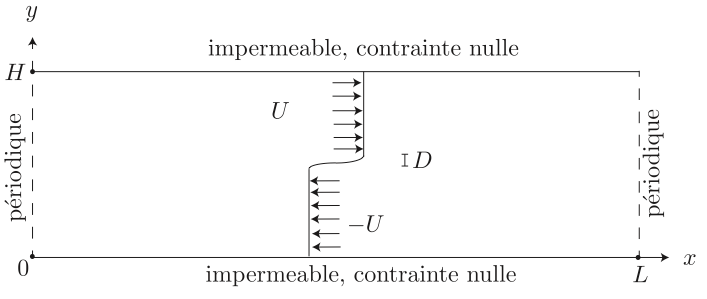

Pour étudier l'instabilité de Kelvin-Helmholtz, on initialise l'écoulement comme une couche de cisaillement symétrique par rapport au plan $y=H/2$. Pour $y > H/2$, la vitesse est positive et elle tend vers $U \vec{e}_x$ suffisament loin de la couche. En dessous, la vitesse est négative et tend vers $-U \vec{e}_x$. Au du milieu canal, la vitesse horizontale change brusquement de sens, sur une distance de taille $D$. Suite à la symétrie, le débit moyen dans le canal est nul. Dans ce TP, on paramétrise cet écoulement initial comme

$$
\mbox{CI :} \  \ u_x |_{t=0} =  U \, \mbox{erf}\left  (\frac{4y-2H }{D} \right ) + u'_x \quad , \quad u_y (x,y,0) = u'_y \label{CI_dim}
$$

Ici $\mbox{erf}$ est la fonction erreur, définie par

$$
\mbox{erf}(s) =\frac{2}{\sqrt{\pi}}  \int_{0}^s  e^{-\tilde{s}^2} d \tilde{s}   
$$

Cette fonction erreur est impaire (par définition $\mbox{erf}(s)  = - \mbox{erf}(-s) $) et tend vers $\pm 1$ à  $|s| |\gg 1$. Le champ de vitesse  $\vec{u}'$ correspond à un bruit additif qu'on ajoute à l'écoulement. Ce bruit représente une perturbation aléatoire de la vitesse de faible magnitude $u' << U$. Dans ce TP, on définit plus précisément $u'$ comme étant 

$$ 
u' = \max \left (  \sqrt{u_x'^2 + u_y'^2} \right ) 
$$

Ce bruit permet de déclencher l'instabilité de Kelvin-Helmholtz et on veut contrôler son amplitude. On le définit plus précisément plus bas.  

En $y=0,H$ on suppose une condition au limite d'imperméabilité  et également que la contrainte tangentielle visqueuse y est nulle: 

$$ 
\mbox{CL$_1$ :}\quad \left . u_y \right |_{y=0,H} = 0      \quad , \quad 
\mbox{CL$_2$ :} \quad  \left . \frac{\partial u_y}{\partial x} + \frac{\partial u_x}{\partial y}  \right  |_{y=0,H} = 0
$$

La condition limite  CL 2 est une idéalisation car normalement il faudrait une condition de non-glissement. L'intérêt d'une condition limite de glissement est qu'elle est plus simple à implémenter. Cette condition aux limites n'affecte pas l'essentiel de l'instabilité qui vient de la couche de cisaillement. Dans la direction $x$ on supposera un domain ouvert mais périodique. Alors on a 

$$
\forall x \ : \ \vec{u} (x+L,y,t) =  \vec{u} (x,y,t)  
$$

Ceci revient à dire que l'écoulement et le domaine se répètent infiniment dans la direction $x$ avec une longueur de périodicité de $L$. En pratique, il faut s'assurer que tout ce qui sort d'un coté, ré-entre de l'autre coté. 

### 2.2. Formulation primitive, adimensionnée

On choisit de travailler avec une version adimensionnée du problème dans la suite. Les échelles d'espace, temps,  vitesse et pression sont choisies comme

$$
[x,y] = H , \quad [t] = H/U , \quad  [u_x,u_y] = U   , \quad [p] =  \rho U^2 
$$

On ne change pas la notation pour noter les variables adimensionnées. Si on fait le décompte, on arrive sur un problème adimensionné qui dépend de **cinq nombres sans dimension**

$$
Re = \frac{UH}{\nu} \quad , \quad \lambda = \frac{L}{H} \quad , \quad \delta = \frac{D}{H} \quad , \quad T = \frac{U T_f}{H}  \quad , \quad  \epsilon = \frac{u'}{U}
$$

On reconnait le nombre de Reynolds $Re$, la longueur adimensionnée du canal $\lambda$, l'épaisseur adimensionnée $\delta$ de la couche de cisaillement et $T$ la durée de la simulation en unités de temps advectives. Vis à vis de ces échelles, on doit résoudre


\begin{eqnarray}
\frac{\partial u_x}{\partial t}  + u_x \frac{\partial u_x}{\partial x} + u_y \frac{\partial u_x}{\partial y}   &=&  - \frac{1}{\rho} \frac{\partial p}{\partial x} + Re^{-1}   \left ( \frac{\partial^2 u_x}{\partial x^2}  + \frac{\partial^2 u_x}{\partial y^2}  \right )  \\
\frac{\partial u_y}{\partial t}  + u_x \frac{\partial u_y}{\partial x} + u_y \frac{\partial u_y}{\partial y}   &=&  - \frac{1}{\rho} \frac{\partial p}{\partial y} + Re^{-1}   \left ( \frac{\partial^2 u_y}{\partial x^2}  + \frac{\partial^2 u_y}{\partial y^2}  \right )  \\
\frac{\partial u_x}{\partial x}  + \frac{\partial u_y}{\partial y} & = & 0  
\end{eqnarray}

sur un domaine rectangulaire de hauteur $1$ et de longueur $\lambda$ et pour $t\in [0,T]$. L'état initial est 

$$
\mbox{CI :} \  \ u_x |_{t=0} =   \mbox{erf}\left  (\frac{4y-2 }{\delta} \right ) + \epsilon \, u'_x \quad , \quad u_y (x,y,0) = \epsilon \, u'_y \label{CI_dim}
$$

La solution est supposée $\lambda$-périodique

$$
\forall x \ : \ \vec{u} (x+\lambda,y,t) =  \vec{u} (x,y,t)  
$$

et en $y=0,1$ on a les conditions aux limites 

$$ 
\mbox{CL$_1$ :}\quad \left . u_y \right |_{y=0,1} = 0      \quad , \quad 
\mbox{CL$_2$ :} \quad  \left . \frac{\partial u_y}{\partial x} + \frac{\partial u_x}{\partial y}  \right  |_{y=0,1} = 0
$$


### 2.3. Formulation $\omega$ - $\psi$

Pour résoudre ce problème de mécanique des fluides incompressibel en 2D, il est utile de passer à la formulation $\omega-\psi$. L'idée est de remplacer le système original de 3 équations pour $u_x,u_y$ et $p$ par un système de 2 équations pour $\omega(x,y,t) $, la vorticité et $\psi (x,y,t) $, la fonction de courant. La fonction de courant est liée à la vitesse par les relations

$$
\vec{u} = \vec{\nabla} \times \psi \vec{e}_z  = \frac{\partial \psi}{\partial y }  \vec{e}_x   - \frac{\partial \psi}{\partial x }   \vec{e}_y  
$$

On peut montrer que les iso-lignes de la fonction de courant correspondent aux lignes de champ du champ de vitesse (les lignes parallèles à $\vec{u}$ à tout point de l'espace).  On constate que l'incompressibilité est automatiquement satisfaite 

$$
\vec{\nabla} \cdot \vec{u} = \vec{\nabla} \cdot ( \vec{\nabla} \times \psi \vec{e}_z )= 0 
$$

Ainsi, on n'aura donc plus de considérer cette incompressibilité par la suite. La vorticité est définie comme le rotationnel de la vitesse et devient 

$$
\vec{\omega} =  \vec{\nabla} \times   \vec{\nabla} \times \psi \vec{e}_z  =  - \nabla^2 \psi \vec{e}_z + \vec{\nabla} \underbrace{(  \vec{\nabla} \cdot  \psi \vec{e}_z )}_{=0} 
$$

Le deuxième terme disparait car $\vec{\nabla} \cdot  \psi \vec{e}_z = \partial_z \psi = 0$. Si on introduit une nouvelle variable $\omega(x,y,t)$ pour la vorticité selon $z$, on a un problème de Poisson

$$
\nabla^2 \psi  = - \omega  \quad \quad (1)
$$

Cette équation définit la première des 2 équations dans la formulation $\omega-\psi$. L'autre équation est l'équation de vorticité et on la trouve en calculant $\vec{e}_z \cdot \vec{\nabla} \times (\text{Navier-Stokes})$. Après quelques simplifications, on trouve cette équation de vorticité comme  

$$
\frac{\partial \omega}{\partial t}  =   \underbrace{ \left (-  \frac{\partial \psi}{\partial y }  \frac{\partial \omega }{\partial x }  +   \frac{\partial \psi}{\partial x }  \frac{\partial \omega }{\partial y }    \right )}_{NL \, =\,   - \vec{u} \cdot \vec{\nabla} \omega } +  Re^{-1}  \left (  \frac{\partial^2 \omega}{\partial x^2 } +  \frac{\partial^2 \omega}{\partial y^2 }   \right ) \quad \quad (2)
$$

A cause du rotationnel, le gradient de pression n'apparait pas dans l'équation de vorticité. On n'a plus besoin de cette variable de pression dans cette formulation  $\omega-\psi$. On reconnait ici une équation de diffusion-advection. Le terme d'advection $ - \vec{u} \cdot \vec{\nabla} \omega$ rend le problème non-linéaire et sera nommé terme non-linéaire (NL) dans la suite. Combiné, les équations (1) et (2) définissent la formulation $\omega$-psi. Il faut résoudre un problème de Poisson et un problème de diffusion en même temps. Le tout est non-linéaire car la vitesse de fluide transporte la vorticité.   

On veut maintenant exprimer la condition initiale dans ce formalisme $\omega - \psi$. Pour le bruit $\vec{u}'$ on introduit une nouvelle variale $\psi'$ telle que $\vec{u}' = \vec{\nabla} \times \psi' \vec{e}_z$. Ainsi, on a de la condition aux limites originale 

$$
\partial_y \psi |_{t=0}=   \mbox{erf}\left  (\frac{4y-2 }{\delta} \right ) + \epsilon \, \partial_y \psi' \quad , \quad   \partial_x \psi|_{t=0} =  \epsilon \, \partial_x \psi' 
$$

La fonction primitive de la fonction erreur étant 

$$
\int^z \mbox{erf}(z) \, dz = z \, \mbox{erf}(z) + \dfrac{\exp( {-z^2})}{\sqrt{\pi}}
$$

on peut intégrer l'équation la composante $x$ de la condition initiale selon $y$ pour trouver 

\begin{eqnarray}
CI_1 \ : \ \psi |_{t=0} &=&  \frac{\delta}{4} \left [ \left ( \frac{4y -2}{\delta} \right ) \mbox{erf}  \left ( \frac{4y -2}{\delta} \right )  + \left ( \frac{2}{\delta} \right ) \mbox{erf}  \left ( \frac{-2}{\delta} \right )   + \frac{1}{\sqrt{\pi}}   \exp \left ( - \left ( \dfrac{4y -2}{\delta} \right )^2  \right )   -  \frac{1}{\sqrt{\pi}}   \exp \left ( - \dfrac{4}{\delta^2}  \right )     \right ]   + \epsilon \, \psi'  
\end{eqnarray}

Ici on a fixé la constante d'intégration, pour avoir $\psi |_{y=0,1}=0$ sur les parois en absence de bruit. Cette propriété est désirable car elle préserve la symétrie.  La fonction $\psi'$ portera un **bruit Gaussien de moyenne nulle et de variance 1.**  On s'assurera que ce bruit satisfasse la condition aux limites $\psi' |_{y=0,1}=0$ et on normalisera la fonction $\psi'$ pour avoir 

$$
\max\left  ( \sqrt{ (\partial_x \psi' )^2 +(\partial_y \psi' )^2  } \right ) = 1 
$$ 

La condition initiale pour la vorticité se calcule à partir de celle de la fonction de courant, il suffit d'appliquer - le Laplacien

\begin{eqnarray}
CI_2 \ : \ \omega|_{t=0}&=&    - \left ( \frac{\partial^2  }{\partial x^2} + \frac{\partial^2  }{\partial y^2} \right ) \psi |_{t=0}
\end{eqnarray}

Il est inutile de calculer l'expression exacte ici car dans le code on ne le fera pas non plus. 

Reste enfin à traduire les conditions aux limites. La condition d'imperméabilité en haut et en bas, $CL_1$, exige que $\partial_x \psi |_{y=0,1} =0$. La dérivée selon $x$ s'annule donc pour tout $x$. On peut en déduire que la fonction de courant $\psi$ doit être constante sur ces deux parois

$$
CL_1 \ : \ \psi |_{y=0} = C_{bas}  \quad , \quad \psi |_{y=1} = C_{haut}
$$

Ces constantes $C_{bas}$ et $C_{haut}$ sont à priori non-nulles. On peut en fixer une sans perte de généralité car toutes les fonctions de courants sont déterminées a des constantes prêts. On choisit donc $C_{bas} =0$ ce qui va bien aussi avec la condition initiale. La valeur de $C_haut$ n'est pas forcément nulle mais attention: si elle est non-identique à $C_{haut}$ elle causera un débit moyen dans le canal. En effet, on a

$$
Q = \int_{0}^1 u_x dy  = \int_{0}^1 \partial_y \psi dy  = \psi |_{y=1} - \psi |_{y=0} = C_{haut} -  C_{bas}
$$

Comme on a choisi une condition initiale (erf) symétrique par rapport à la ligne centrale $y=1/2$, le débit dans la section est nulle et le restera aussi durant toute la simulation. De $Q=0$, on déduit donc $C_{haut}= C_{bas}$ et comme $C_{bas}=0$, $C_{haut}=0$ donc aussi. La condition limite $CL_2$ de glissement libre doit aussi être exprimée à l'aide de la fonction de courant ou la vorticité. On a 

$$
CL_2 \ : \  \underbrace{\left . - \frac{\partial^2 \psi }{\partial x^2}\right  |_{y=0,1}}_{=0}  + \left . \frac{\partial^2 \psi }{\partial y^2}  \right  |_{y=0,1} = 0
$$

Comme la fonction de courant est constante en haut et en bas, sur $y=0,1$, le premier terme disparait. On remarque ensuite que la vorticité sur les parois $y=0,1$ vaut

$$
 \left .  \omega \right  |_{y=0,1} = \underbrace{\left . - \frac{\partial^2 \psi }{\partial x^2}\right  |_{y=0,1}}_{=0}  - \left . \frac{\partial^2 \psi }{\partial y^2}  \right  |_{y=0,1} 
$$

Ici on a tout simplement utilisé la définition $\omega = - \nabla^2 \psi$. Ici aussi, le premier terme disparait. Combinant les deux dernières equations, on comprend donc que la condition aux limites $CL_2$ de glissement libre, implique que la vorticité s'annule sur les parois $y=0,1$. En résumé, les conditions aux limites $CL_1$ et $CL_2$ se traduisent comme 

\begin{eqnarray}
CL_1 & : & \psi |_{y=0,1} = 0  \\
CL_2 & : & \left . \omega \right |_{y=0,1} = 0 
\end{eqnarray}

dans notre formalisme $\omega-\psi$ du problème.  


### 2.4. Problème continu: résumé

En résumé, on a un problème de mécanique des fluides qui dépend de 5 paramètres sans dimension $(Re, \lambda,\delta,T,\epsilon)$. Il faut trouver deux champs, $\omega (x,y,t)$ et $\psi(x,y,t)$ pour tout $x\in [0,\lambda]$ et $y \in [0,1]$, satisfant le système d'équations différentielles

\begin{eqnarray}
\frac{\partial \omega}{\partial t}  =   \underbrace{ \left (-  \frac{\partial \psi}{\partial y }  \frac{\partial \omega }{\partial x }  +   \frac{\partial \psi}{\partial x }  \frac{\partial \omega }{\partial y }    \right )}_{NL} +  Re^{-1}  \left (  \frac{\partial^2 \omega}{\partial x^2 } +  \frac{\partial^2 \omega}{\partial y^2 }   \right ) && \quad  \quad \text{(eq. de vorticité)}\\
\frac{\partial^2 \psi}{\partial x^2 } +  \frac{\partial^2 \psi}{\partial y^2 }    = - \omega && \quad  \quad  \text{(eq. pour la fonction de courant)}
\end{eqnarray}

Les champs sont $\lambda$-périodique selon $x$ et sur les bords $y=0,1$ on a 

\begin{eqnarray}
CL & : & \psi |_{y=0,1} = 0  \quad, \quad  \left . \omega \right |_{y=0,1} = 0 
\end{eqnarray}

A l'instant initiale, on a 

\begin{eqnarray}
CI & : & \psi |_{t=0} =  \frac{\delta}{4} \left [ \left ( \frac{4y -2}{\delta} \right ) \mbox{erf}  \left ( \frac{4y -2}{\delta} \right )  + \left ( \frac{2}{\delta} \right ) \mbox{erf}  \left ( \frac{-2}{\delta} \right )   + \frac{1}{\sqrt{\pi}}   \exp \left ( - \left ( \dfrac{4y -2}{\delta} \right )^2  \right )   -  \frac{1}{\sqrt{\pi}}   \exp \left ( - \dfrac{4}{\delta^2}  \right )     \right ]   + \epsilon \, \psi'  \\
 && \omega |_{t=0} =    - \left ( \frac{\partial^2  }{\partial x^2} + \frac{\partial^2  }{\partial y^2} \right ) \psi |_{t=0}
\end{eqnarray}

La fonction $\psi'$ est un bruit Gaussien aléatoire de moyenne nulle et de variance 1. Ce bruit est normalisé pour avoir $\max ( \sqrt{ (\partial_x \psi' )^2 +(\partial_y \psi' )^2  } = 1 ) $. 


## 3. Problème discret

### 3.1 Maillage uniforme, temps discrets et discrétisation des champs

Dans la figure ci-dessous, on montre le maillage qui servira pour discrétiser le problème. 

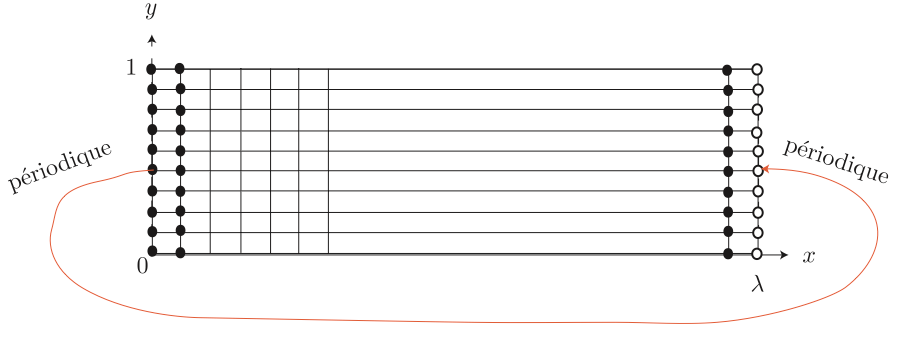

Suivant les conventions de notations prises au premier semestre, on compte au total $(M_x + 1)(M_y + 1)$ points dans ce maillage, mais suite à la périodicité, la rangée de droite (ou de gauche) sera superflue. En effet, dans les sites ($\circ$), on supposera que les valeurs sont celles qui se trouvent de l'autre coté, comme le montrent la flèche orange. Ceci réduit le maillage de calcul aux seuls sites ($\bullet$), soit  les points $(x_i,y_j)$ où   

\begin{eqnarray}
x_i &=&  i\,  \delta x \quad , \quad i=0,\ldots,M_x -1 \nonumber \\
y_j &=&  j \,  \delta y \quad , \quad j=0,\ldots,M_y 
\end{eqnarray}

Ce maillage réduit a donc seulement $M_x (M_y+1)$ points, mais on doit bien utiliser $\delta x = \lambda/ M_x$ et $\delta y = 1 / M_y$.  
On utilise des pas de temps constants 

$$
t_n = n \ \delta t \quad , \quad n=0,\ldots,N
$$

avec $\delta t = T/N$. On notera

$$
\psi_{i,j}^n = \psi(x_i,y_j,t_n) \quad , \quad \omega_{i,j}^n = \omega(x_i,y_j,t_n)
$$

Pour exprimer les équations différentielles sur les points intérieurs du maillage, on aura besoin des indices voisin d'un point $(i,j)$. Dans **toute la suite**, utiliser systématiquement les noms d'indices $i_+$ et $i_-$  définis par 

$$
i_+ =\left \{  \begin{array}{rcl} 
i + 1 &,&  i \neq M_x -1 \\
0 &,&  i = M_x -1 \\
\end{array} \right .  \quad , \quad i_- =\left \{  \begin{array}{rcl} 
i - 1 &,&  i \neq 0 \\
M_x-1 &,&  i = 0  \\
\end{array} \right .
$$

en remplacement des indices $i\pm 1$. Cette notation sera utile pour programmer la périodicité selon $x$. 

### 3.2 Equations du problème discret

On discrétise le problème avec une méthode de différences finies qui est d'ordre 2 en espace et en temps. Dans l'équation de vorticité, on souhaite un schéma de **Crank-Nicolson pour le terme diffusif et un schéma d'Adams-Bashforth d'ordre 2 pour le terme non-linéaire NL**. 

#### 🔥🔥🔥 Question 🔥🔥🔥

Compléter ci-dessous, les équations pour **les points de bords (uniquement en haut et en bas)** et à temps $t^{n+1}$. 

\begin{eqnarray}
\psi_{i,0}^{n+1} &=&  \ldots \\
\psi_{i,M_y}^{n+1} &=&  \ldots   \\
\omega_{i,0}^{n+1} &=&  \ldots   \\
\omega_{i,M_y}^{n+1} &=&  \ldots 
\end{eqnarray}

pour tout $i = \ldots $ (**double-cliquer sur la cellule pour éditer le texte et remplacer les ...**) 

#### 🔥🔥🔥 Question 🔥🔥🔥

Compléter ci-dessous, les équations pour **les point intérieurs** qui vont permettre de calculer le champ à temps $t^{n+1}$. 

$$
\ldots  \ \omega_{i,j}^{n+1} + \ldots =  \ldots   
$$

$$
\ldots \ \psi_{i,j}^{n+1} =  \ldots    
$$

pour tout  $i =\ldots $ et $j=\ldots$. (**double-cliquer sur la cellule pour éditer le texte et remplacer les .... Utiliser les notations $i_+$ et $i_-$ a la place de $i+1$ et $i+1$.**)  

#### 🔥🔥🔥 Question 🔥🔥🔥

Ecrire la condition initiale pour la fonction de courant 

$$
\psi_{i,j}^{0} = \ldots 
$$

pour tout  $i =\ldots$ et $j=\ldots$. (**double-cliquer sur la cellule pour éditer le texte et remplacer les ...**)

#### 🔥🔥🔥 Question 🔥🔥🔥

Les valeurs $\omega_{i,j}^{0}$ sont reliées à celles de $\psi_{i,j}^{0}$ par le Laplacien. Utiliser l'opérateur Laplacien discrétisé pour donner 

$$
\omega_{i,j}^{0} = \ldots 
$$

pour tout  $i =\ldots$ et $j=\ldots$. (**double-cliquer sur la cellule pour éditer le texte et remplacer les ...**)

### 3.3 Notation matricielle

On doit écrire le problème discret sous forme matricielle. On utilise les mêmes conventions qu'en cours, où les champs $\psi(x,y,t)$ et $\omega(x,y,t)$ discrétisés sur les points de maillage $x_i$ et $y_j$, à l'instant $t_n$ sont représentés par de grands vecteurs  

$$
\boldsymbol{\psi}^n = \Big [ \ldots \ldots \Big] \quad , \quad \boldsymbol{\omega}^n = \Big [ \ldots \ldots \Big] 
$$

Ce vecteurs contiennent toutes les valeurs nodales dans un ordre très précis. Avec la convention du cours, on utilisera l'indexation 

$$
ind =  i (M_y +1 ) + j 
$$

Par convention, ce nouvel index donne la position des valeurs nodales $\psi_{i,j}^n$ et $\omega_{i,j}^n$ dans les vecteurs $\boldsymbol{\psi}^n$, $\boldsymbol{\omega}^n$. Nous notons $N_{tot}$ le nombre total de points. 

Dans ce TP 4 du semestre 1, vous avez déjà construit une grande matrice creuse pour résoudre le problème de Poisson 2D. Ici,on construira d'autres grandes matrices creuses qui sont assez similaires. Par contre, afin de gagner en flexibilité, on apprend ici à construire ces grandes matrices en sommant plusieurs différentes matrices de structure plus simple. Ainsi on introduit 

\begin{eqnarray}
\mathcal{I} &=& \text{matrice identité.}  \\
\mathcal{P} &=& \text{matrice diagonale de projection, 1 si ligne pt intérieur, 0 si ligne pt de bord.}  \\
\mathcal{PD} &=& \text{matrice laplacien, [a,b,c,b,a] si ligne pt intérieur, 0 si ligne pt de bord.}  \\
\mathcal{PAx} &=& \text{matrice dérivation selon x, [-d,d] si ligne pt intérieur, 0 si ligne pt de bord.}  \\
\mathcal{PAy} &=& \text{matrice dérivation selon x, [-e,e] si ligne pt intérieur, 0 si ligne pt de bord.}  
\end{eqnarray}

toutes creuses, de taille $N_{tot} \times N_{tot}$. A vous d'identifier ce que valent $a,b,c,d,e$. 


**Equations matricielles pour la mise à jour: préliminaire**

Avec ces matrices, on peut écrire le problème pour **les points de bords** de manière matricielle comme 

\begin{eqnarray}
\left ( \mathcal{I} - \mathcal{P}  \right) \boldsymbol{\psi}^{n+1} &= &\boldsymbol{0} \\ 
\left ( \mathcal{I} - \mathcal{P}  \right) \boldsymbol{\omega}^{n+1} &=& \boldsymbol{0} \quad \quad (*)
\end{eqnarray}

Ici $\boldsymbol{0} $ est un vecteur zéro de taille $N_{tot}$. La matrice $ \mathcal{I} - \mathcal{P} $ est un projecteur pour les points de bords: 1 sur un point de bord, 0 sur un point intérieur. Ainsi l'équation ci-dessus, ne contient que de l'information sur les points de bords. Toutes les lignes correspondantes aux points intérieurs expriment que $0=0$ et ne portent donc aucune information.


Pour écrire la formulation matricielle des équations **des points intérieurs**, on applique la même logique. On veut des lignes $0=0$ pour les points de bords. Les lignes des points intérieurs reflètent le schéma numérique choisi. Ainsi on aura 

\begin{eqnarray}
\mathcal{PD}   \, \boldsymbol{\psi}^{n+1}  & =&    - \mathcal{P} \boldsymbol{\omega}^{n+1} \\
\left (\mathcal{P} - \frac{\delta t}{2  Re} \mathcal{PD}  \right ) \boldsymbol{\omega}^{n+1} &=&  \left (\mathcal{P} + \frac{\delta t}{2  Re} \mathcal{PD}  \right )   \boldsymbol{\omega}^{n} + \frac{\delta t}{2} \left ( 3 \boldsymbol{NL}^{n} -  \boldsymbol{NL}^{n-1}  \right )       \quad \quad (**)
\end{eqnarray}

et le terme non-linéaire se calcule comme 

$$
\boldsymbol{NL}^{n}  = - ( \mathcal{PA}_y\boldsymbol{\psi}^n )*(\mathcal{PA}_x\boldsymbol{\omega}^n )  + (\mathcal{PA}_x \boldsymbol{\psi}^n )*( \mathcal{PA}_y  \boldsymbol{\omega}^n )  
$$

On écrit explicitement $*$ le produit élément par élément afin d'éviter toute confusion avec le produit matriciel. 

**Equations matricielles pour la mise à jour: sommer ($*$) et ($**$)**

Afin d'obtenir l'écriture matricielle finale des équations de mise à jour, il suffit de sommer les systèmes ($*$) et ($**$). Ca donne 

\begin{eqnarray}
\underbrace{ \left (\mathcal{I}-\mathcal{P} + \mathcal{PD}  \right )}_{\boldsymbol{O}_{g,\psi}}  \,  \boldsymbol{\psi}^{n+1}  & = &   - \mathcal{P} \, \boldsymbol{\omega}^{n+1} \label{Psiform} \\
\underbrace{\left (\mathcal{I} - \frac{\delta t}{2  Re} \mathcal{PD}  \right ) }_{\boldsymbol{O}_{g,\omega}} \, \boldsymbol{\omega}^{n+1}& =&\underbrace{ \left (\mathcal{P} + \frac{\delta t}{2  Re} \mathcal{PD}  \right ) }_{\boldsymbol{O}_{d,\omega}}  \, \boldsymbol{\omega}^{n} + \frac{\delta t}{2} \left ( 3 \boldsymbol{NL}^{n} -  \boldsymbol{NL}^{n-1}  \right ) 
\end{eqnarray}


On identifie ici les matrices de gauche et de droite qui vont avec notre choix de schéma. On distingue $\boldsymbol{O}_{g,\psi}$ pour l'équation de la fonction de courant et $\boldsymbol{O}_{g,\omega}$ , $\boldsymbol{O}_{d,\omega}$ pour l'équation de vorticité.  

**Gestion terme non-linéaire**

Dans le schéma d'Adams-Bashfort, on a besoin de deux pas précédents. Ainsi, on a potentiellement un problème pour initialiser le code. Afin de gérer cette difficulté, on utiliser dans le programme, deux vecteurs 

$$
\boldsymbol{NLnm1} , \boldsymbol{NLn}
$$

Ces vecteurs contiennent dans tout le calcul, les termes non-linéaires aux instants $n-1$ et $n$. Connaissant les vecteurs initiaux $\boldsymbol{\psi}^0$ et $\boldsymbol{\omega}^0$, on pourra initialisera le vecteur $\boldsymbol{NLn}$ avec la formule donnée. En initialisant 

$$
\boldsymbol{NLnm1} =\text{copie de} \, \boldsymbol{NLn}
$$
 
le code pourra démarrer par un premier pas de temps d'Euler explicite (même astuce que dans l'équation de Burgers du premier semestre). Ensuite on entrera dans la boucle principale de mis à jour. A chaque pas de temps, il faut résoudre 2 systèmes linéaires, un premier pour trouver $\boldsymbol{\psi}^{n+1}$, un deuxième pour trouver $\boldsymbol{\omega}^{n+1}$. Après ces mises à jour, on copiera le terme non-linéaire à l'instant $n$ dans la variable $n-1$. 

$$
\boldsymbol{NLnm1} =\text{copie de} \, \boldsymbol{NLn}
$$

et on calculera un nouveau terme non-linéaire $\boldsymbol{NLn}$ avec les nouveaux vecteurs $\boldsymbol{\psi}^{n+1}$ et $\boldsymbol{\omega}^{n+1}$, afin de préparer le pas de temps suivant. 

## 4. Programmation

### 4.1. Fonction Matcreate

On commencer par programmer une fonction dont le but est de créer les matrices creuses qui vont servir dans la simulation. Il s'agit des 5 matrices

$$
\mathcal{I}, \mathcal{P}, \mathcal{PD}, \mathcal{PA}_x, , \mathcal{PA}_y 
$$

respectivement l'identité, la matrice de projection sur les points intérieurs, la matrice de diffusion sur les points intérieurs, les matrices de dérivation selon $x$ et $y$ sur les points intérieurs. 

A l'entrée de la fonction on fournit 3 arguments $\lambda$ la longueur du canal et $M_x, M_y$ du maillage. Attention, le mot-clé ```lambda``` est réservé en python. On utilisera ```lam``` comme nom de la variable $\lambda$ dans le code. 

Ci-dessous, nous avons préparé un programme à trous qu'ils faudra remplir. Pour imposer les conditions de périodicité, utiliser l'astuce  qui consiste à définir les variables

$$
ip =\left \{  \begin{array}{rcl} 
i + 1 &,&  i \neq M_x -1 \\
0 &,&  i = M_x -1 \\
\end{array} \right .  \quad , \quad im =\left \{  \begin{array}{rcl} 
i - 1 &,&  i \neq 0 \\
M_x-1 &,&  i = 0  \\
\end{array} \right .
$$

Si vous utilisez ensuite ces variables $ip$ et $im$ dans les formules qui définissent les indices $indE$ et $indO$ des voisins à l'est ($i+1$) et à l'ouest ($i-1$) la périodicité sera automatiquement importée. 


In [ ]:
from scipy.sparse import coo_matrix,identity
import numpy as np

# Remplir cette fonction 
def MATcreate(lam,Mx,My):

    Ntot=...     #nombre de pts total
    Nint=...     #nombre de pts int

    dx=...
    dy=...
    
    
    #I: matrice unité 
    I=identity(Ntot,format="coo");

    #P: matrice de projection  sur les points intérieurs
    #1 sur la diagonale si pt intérieur, 0 autrement
    N_nonnuls=... 
    row=np.zeros(N_nonnuls)
    col=np.zeros(N_nonnuls)
    val=np.zeros(N_nonnuls)

    compte=0  #indice offset -1
    for i in ...:   # pour i allant de 0 à Mx-1 
        for j in ...:   # pour j allant de 1 à My-1 
        
            ind=...

            #repeter ce bloc autant de fois que nécessaire
            row[compte],col[compte],val[compte]=...
            compte=compte+1   
            
    P=coo_matrix((val, (row, col)), shape=(Ntot, Ntot))        
    
    #PD: matrice de diffusion sur les points intérieurs
    #0 sur les lignes des points ext
    #[a,b,c,b,a] sur les lignes des point int
    a=...;
    b=...;
    c=...;

    N_nonnuls=...
    row=np.zeros(N_nonnuls)
    col=np.zeros(N_nonnuls)
    val=np.zeros(N_nonnuls)

    compte=0   #compteur dernier indice
    for i in ...:   # pour i allant de 0 à Mx-1 
        for j in ...:   # pour j allant de 1 à My-1 
        
            #definir indices ip et im, pour gestion de la périodicité
            if i==...:
                ip=...
            else:
                ip
                
            if i==...:
                im=...
            else:
                im=
                                
            #indices nouvelle numérotation
            ind=...
            indN=...
            indS=...
            indE=...
            indO=...
        
            #repeter ce bloc autant de fois que nécessaire
            row[compte],col[compte],val[compte]=...
            compte=compte+1   
    
    PD=coo_matrix((val, (row, col)), shape=(Ntot, Ntot)) 
    
    #PAx: matrice de dérivation selon x sur les points intérieurs
    #0 sur les lignes des points ext
    #[-1/(2*dx) ,1/(2*dx)] sur les lignes des point int 
    N_nonnuls=... 
    row=np.zeros(N_nonnuls)
    col=np.zeros(N_nonnuls)
    val=np.zeros(N_nonnuls)

    
    compte=0  #compteur dernier indice
    for i in ...:   # pour i allant de 0 à Mx-1 
        for j in ...:   # pour i allant de 1 à My-1 
        
            if i==...:
                ip=...
            else:
                ip
                
            if i==...:
                im=...
            else:
                im=
                                
            
            ind=...
            indE=...
            indO=...
        
            #repeter ce bloc autant de fois que nécessaire
            row[compte],col[compte],val[compte]=...
            compte=compte+1   
  
    
    PAx=coo_matrix((val, (row, col)), shape=(Ntot, Ntot))
    
    
    #PAy: matrice de dérivation selon y sur les points intérieurs
    #0 sur les lignes des points ext
    #[-1/(2*dy) ,1/(2*dy)] sur les lignes des point int 
    N_nonnuls=... 
    row=np.zeros(N_nonnuls)
    col=np.zeros(N_nonnuls)
    val=np.zeros(N_nonnuls)

    
    compte=0   #compteur dernier indice
    for i in ...:   # pour i allant de 0 à Mx-1 
        for j in ...:   # pour i allant de 1 à My-1           
            
            ind=...
            indN=...
            indS=...
        
            #repeter ce bloc autant de fois que nécessaire
            row[compte],col[compte],val[compte]=...
            compte=compte+1   

    PAy=coo_matrix((val, (row, col)), shape=(Ntot, Ntot))
    
    return I,P,PD,PAx,PAy 

### Test 

Les matrices $\mathcal{I}$ et $\mathcal{P}$ sont facilement testées, mais pas les autres. Pour tester la bonne implémentation des matrices $\mathcal{PD}, \mathcal{PA}_x, \mathcal{PA}_y$, on choisit une fonction $f(x,y)$ $\lambda$-périodique, dont on sait calculer le Laplacien et les dérivées selon $x$ et $y$. Exemple

$$
f(x,y) = \cos \left (\frac{2 \pi x}{\lambda}\right ) \sin \left (\pi y  \right)
$$

Cette fonction s'annule en $y=0,1$. 

#### 🔥🔥🔥 Question 🔥🔥🔥

Calculer les dérivées partielles $\partial_x f$ et $\partial_y f$ et le Laplacien $ \nabla^2 f$. 


**Votre réponse ici, double cliquer sur la cellule et remplacer ce texte**

Dans la cellule suivante, définir le maillage **réduit**, puis calculer les composantes des vecteurs suivants

```
#la fonction
f_exact[ind] = ...   

#derivée selon x
dfdx_exact[ind] = ...

#dérivée selon y
dfdy_exact[ind] = ...

#laplacien de f
lapf_exact[ind] = ...
```

à l'aide d'une double boucle sur $i$ et $j$ et les bonnes formules trouvées ci-dessus. Ensuite, imprimer à l'écran, la valeur **maximale**, de la valeur **absolue** de la **différence** entre le vecteur exact et l'approximation numérique. Par exemple, pour tester le bon calcul de la dérivée selon $x$ sur les points intérieurs, il faudra que  `np.max(np.abs(dfdx_exact-PAx.dot(f))` soit petite.

Compléter le code test suivant

In [ ]:
#définir lam et Mx, My
lam=...
Mx=...
My=...

#créer les matrices creuses
I,P,PD,PAx,PAy=MATcreate(lam,Mx,My)

#pas d'espace
dx=lam/Mx
dy=1/My

f=np.zeros(...)
lapf_exact=np.zeros(...)
dfdx_exact=np.zeros(...)
dfdy_exact=np.zeros(...)

for i in ...:   # pour i allant de 0 à Mx-1 
    for j in ...:   # pour j allant de 0 à My
        
        ind=i*(My+1)+j
        x=i*dx
        y=j*dy
        
        f[ind]=...
        lapf_exact[ind]=...
        dfdx_exact[ind]=...
        dfdy_exact[ind]=...
        
print("test sur l'operateur laplacien:")
print("-------------------------------")
print("valeur max exacte:",np.max(lapf_exact))
print("valeur max num:",np.max(PD.dot(f)))
print("max abs difference num:",np.max(np.abs( PD.dot(f)-P.dot(lapf_exact) )))

print("test sur l'operateur dérivation selon x:")
print("----------------------------------------")
print("valeur max exacte:",np.max(dfdx_exact))
print("valeur max num:",np.max(PAx.dot(f)))
print("max abs difference num:",np.max(np.abs( PAx.dot(f)-P.dot(dfdx_exact) )))

print("test sur l'operateur dérivation selon y:")
print("----------------------------------------")
print("valeur max exacte:",np.max(dfdy_exact))
print("valeur max num:",np.max(PAy.dot(f)))
print("max abs difference num:",np.max(np.abs( PAy.dot(f)-P.dot(dfdy_exact) )))  #on doit ajouter P car dfdy ne s'annule pas en y=0,1


### 4.2 Apprendre à initialiser la fonction  de courant et test graphique

La bonne programmation de la condition initiale pour la fonction de courant et pour la vorticité est assez cruciale dans ce TP et un gros point de blocage pour les étudiants. Il faut mieux faire ses armes sur quelques exemples plus simples avant de commencer à programmer. 


#### Calcul de $\psi$ et $\omega$ initial, sans bruit 

Dans la cellule ci-dessus, programmer utilisant une double boucle sur $i,j$ la partie non-bruitée de l'initialisation de la fonction de courant. 

$$
\psi (x,y) = 
\frac{\delta}{4} \left [ \left ( \frac{4y -2}{\delta} \right ) \mbox{erf}  \left ( \frac{4y -2}{\delta} \right )  + \left ( \frac{2}{\delta} \right ) \mbox{erf}  \left ( \frac{-2}{\delta} \right )   + \frac{1}{\sqrt{\pi}}   \exp \left ( - \left ( \dfrac{4y -2}{\delta} \right )^2  \right )   -  \frac{1}{\sqrt{\pi}}   \exp \left ( - \dfrac{4}{\delta^2}  \right )     \right ]  
$$

On représente la fonction $\psi(x,y)$ par un vecteur $\boldsymbol{psi}$, suivant la numérotation habituelle. 

In [ ]:
#importation de la fonction erf
...

delta=...
lam=

Mx=
My=
dx=
dy=


psi=  #zeros 
for i in ...
    for j in ...
        ind=
        xi=
        yj=
        psi[...]=
        

#### Créer un bruit normalisé

On doit créer un bruit $\psi'$ (distribution Gaussienne ou normale, moyenne nulle, variance 1). Trouver tout d'abord l'instruction Python qui permet de générer un vecteur `psiprime` de taille $N_{tot}$ de nombres aléatoires de ce type. 

Le bruit doit ensuite être normalisée afin que $\max ( \sqrt{ (\partial_x \psi' )^2 +(\partial_y \psi' )^2  } = 1$. Avec les matrices $\mathcal{PAx}$ et $\mathcal{PAy}$ on peut calculer les dérivées selon $x$ et $y$, connaissant  `psiprime` et arrive donc à calculer une variable

$$
\text{maxsqrt} = \max ( \sqrt{ (\partial_x \psi' )^2 +(\partial_y \psi' )^2  } 
$$

Pour normaliser le bruit, il suffit de diviser le vecteur `psiprime` du début, par cette valeur. 

In [ ]:
#créer un bruit gaussien
psiprime = ...


#créer les matrices I,P,PD,PAx,PAy

#calculer max (sqrt(...)) avec psiprime et les matrices
maxsqrt=np.max(np.sqrt( ... ))


#normaliser le bruit
psiprime =....


#ajouter un bruit de niveau epsilon
espilon= 
psi= 

Une fois, `psi` crée, on pourra calculer la vorticité vec les matrices. Le faire dans la cellule suivante, puis faire un afficher 2D, qui montre la vorticité dans le plan x-y. Si tout va bien, vous devez voir une couche horizontale fine, d'épaisseur $\delta$ au milieu du canal. 

In [ ]:
#calculer omega
om = ..


#maillage réduit 2D selon x, y 
x=
y=

om_mat=np.zeros([My+1,Mx])  
for i in ...:      
    for j in ...: 
        ind=
        om_mat[j,i]=psi[ind]  
    
#visualiser la fonction om dans le plan sur une figure
..


### 4.3 Fonction KHsimu

Ici vous devez programmer la fonction qui fera la simulation elle même. Cette fonction accepte 9 entrées ($Re,\lambda,\delta,T,\epsilon$ et $M_x,M_y,N,n_{save}$). Le paramètre $n_{save}$ est un entier qui donne la cadence à laquelle on sauvegarde les champs. On veut sauvegarder chaque $n_{save}$ pas de temps et l'état initial est toujours inclu dans les sorties. .

La fonction doit retourner le maillage spatial, les champs psi et omega aux instants précis de sauvegarde et dans un format de matrices 3D (le variables `psi_mat,om_mat`). 

In [ ]:
#importer les librairies nécessaires comme si c'est un programme indépendant
... 
from scipy.sparse.linalg import spsolve, splu


def KHsimu(Re,lam,delta,T,epsil,Mx,My,N,nsave):

    dx=...
    dy=...
    dt=...

    Ntot=...
    
    #créer les matrices
    I,P,PD,PAx,PAy=...
    
    #assembler les matrices de gauche et de droite
    Og_om=...;
    Od_om=...;
    Og_psi=...;

    #convertir format coo en csc format (pour utiliser spsolve ou superlu)
    Og_om=Og_om.tocsc()
    Od_om=Od_om.tocsc()
    Og_psi=Og_psi.tocsc()
    
    #factorisation LU des opérateurs de gauche (pour gagner en temps de calcul)
    #plus bas, on explique comment résoudre un système linéaire. 
    lu_om=splu(Og_om)     
    lu_psi=splu(Og_psi) 
    
    #tableaux vides pour enregistrer des champs aux différents instants
    #chaque nsave pas de temps
    N_save=N//nsave+1    #nombre total de champs sauvegardés
    psi_save=np.zeros([Ntot,N_save])
    om_save=np.zeros([Ntot,N_save])
    t_save=np.zeros(N_save)
    
    #initialisation
    psin=...            
                       
                       
    omn=...             #utiliser la matrice de diffusion pour le calculer à partir de psin
    
    #initialisation du terme non-linéaire
    NLn=...
    NLnm1=...         
                        
    #enregistrer le champ initial dans les grands tableaux
    psi_save[:,0]=...
    om_save[:,0]=...
    t_save[0]=0

    compte=0  #indice du dernier pas de temps sauvegardé 
    t=0
    #boucle d'avancement temporel
    for n in ...:  #pour n = 1 à N
        
        #temps nouveau
        t=t+dt
        
        #on doit trouver omega^{n+1} comme la solution d'un systeme linéaire
        #on construit d'abord le membre de droite de l'équation de vorticité (avec omn, matrices et termes NL)
        eqom_membredroite=...
        
        #on trouve la solution du système lineare Og_om  om^{n+1}=eqom_membredroite. 
        #Le résultat sera le nouveau état de vorticité, et ici choisit d'écraser la variable omn
        #
        #Comment trouver la solution? Si lu=splu(Og), alors la solution f du système linéaire Og  f = g 
        #s'écrit tout simplement f=lu.solve(g) en python. 
        omn=...
    
        #Dans omn on a la nouvelle vorticité om^{n+1}. Trouver maintenant de la même manière, 
        #la solution du système linéaire qui donne la nouvelle fonction de courant. On écrase la 
        #variable psin       
        psin=...
        
        #enregistrer les champs chaque nsave pas de temps 
        if  ((n%nsave)==0):
            psi_save[:,compte+1]=psin
            om_save[:,compte+1]=omn
            t_save[compte+1]=t
            compte=compte+1
            print(n,' pas sur ',npas)
            
            
        #test d'arrêt si instabilité numerique
        ...
              
            
        #pour préparer le prochain pas de temps, 
        NLnm1=...     
        NLn=...
        
        
    ## Cette section sert à créer les tableaux 3D qui permettent une future visualisation
    # Attention: ça peut donner un message d'erreur 
    # (matrices de dimension pas compatabiles) si vous vous êtes trompé dans le code. 
    psi_mat=np.zeros([My+1,Mx,N_save])  
    om_mat=np.zeros([My+1,Mx,N_save])   
    
    for compte in range(N_save): 
        for i in range(Mx):      
            for j in range(My+1): 
                ind=i*(My+1)+j
                psi_mat[j,i,compte]=psi_save[ind,compte]  
                om_mat[j,i,compte]=om_save[ind,compte]  

    #maillage 2D réduit
    x_mat,y_mat=np.meshgrid(...)        

    return x_mat,y_mat,psi_mat,om_mat,t_save


### 4.4. Tests 

Pour débugger le code, utiliser des paramètres pas trop exigeants et des scripts de lancement comme ceux-ci. On fait une fois le calcul

In [ ]:
#paramètres physiques
Re,lam,delta,T,epsil =100,4,0.1,1,0.1

#paramètres numériques
Mx,My,N,nsave=40,40,100,1

#lancer le code
x_mat,y_mat,psi_mat,om_mat,t_save=KHsimu(Re,lam,delta,T,epsil,Mx,My,N,nsave)

Le calcul terminé, on peut visualiser tous les instantanés. Varier snapshot dans la cellule suivante. 

In [ ]:
import matplotlib.pyplot as plt
#visualisation de omega 
snapshot=3
plt.pcolormesh(x_mat,y_mat,omega_mat[:,:,snapshot])
plt.axis('equal')
plt.text(lam*0.8,0.9,"t = "+f"{t_save[snapshot]:3n}",color="w") 
plt.colorbar()
plt.show()

### 4.5 Visualisation par animation

Ci dessous, créer une animation de votre simulation. Nous voulons sur cette animation, le champ de vorticité en code couleur (contourf est le mieux). Ajouter le nom des axes, une barre de couleur et l'instant $t$.  

Dupliquer cette fonction pour observer aussi l'évolution de $\psi$.

## 5. Etudes

Une fois le programme fonctionnel, vous pouvez faire une étude numérique de cette instabilité de Kelvin-Helmholtz. Choisir vous-même jusqu'à quel point vous voulez  avancer le TP.  

#### 🔥🔥🔥 1. Dynamique à temps long 🔥🔥🔥

Ci-dessous, lancer le code avec des paramètres à $Re=1000,\lambda=4,\delta=0.05, \epsilon = 10^{-1}$ et $M_x=100,M_y=100,N=1000,T=10$. Visualiser la vorticité au cours du temps à l'aide d'une animation (qui ne dure pas trop longtemps). Décrire les observations. Que se passe-t-il avec les tourbillons lorsqu'on intègre longtemps? 


**Votre réponse ici, double cliquer sur la cellule et remplacer ce texte**

In [ ]:
#code ou graphe qui va avec

#### 🔥🔥🔥 2. Influence du bruit  🔥🔥🔥

Modifier l'intensité $\epsilon$ du bruit pour observer son effet. Que se passe-t-il en absence de bruit? Expliquer pourquoi ? 

**Votre réponse ici, double cliquer sur la cellule et remplacer ce texte**

In [ ]:
#code ou graphe qui va avec

#### 🔥🔥🔥 3. Instabilité numérique 🔥🔥🔥

A trop grand $Re$ et pour $\delta x,\delta y, \delta t$ donné, le code deviendra numériquement instable. Proposer ci-dessous, une modification du code `KH_simu_instable` qui détecte l'instabilité numérique et arrête le calcul par la suite. 

**Votre réponse ici, double cliquer sur la cellule et remplacer ce texte**

In [ ]:
#code ou graphe qui va avec

#### 🔥🔥🔥 4. Longueur typique des tourbillons 🔥🔥🔥

Garder $Re$ et $\delta$ fixe, puis étudier comment la longueur typique $l_t$  entre 2 tourbillons dépend de la taille du canal $\lambda$ pendant la phase initiale de la déstabilisation. Choisir des valeurs de $\lambda \in [ 2, 16]$ et modifier $M_x$ afin de travailler à pas d'espace $\delta x$ constant. Trouver une méthode  pour mesurer la longueur typique $l_t$ entre deux tourbillons.  Faire un diagramme qui montre $l_t$ en fonction de $\lambda$. 

**Votre réponse ici, double cliquer sur la cellule et remplacer ce texte**

In [ ]:
#code ou graphe qui va avec

#### 🔥🔥🔥 5. Taux de croissance en fonction de Re 🔥🔥🔥

Le taux de croissance permet de mesurer finement si un écoulement est instable ou pas. On va essayer de le mesurer ici. Proposer ci-dessous un code `KH_simu_taux`, pour qu'il renvoit uniquement deux vecteurs comme résultats: 

`TT`  = vecteur contenant tous les instants discrets t


`VMY`  = vecteur contenant la valeur absolue de la vitesse verticale moyennée sur tous les points du maillage ($\| |u_y| \|_1(t) $) et à tous les instants t

Ensuite:

1. Fixer les paramètres $\lambda, \epsilon, T$ et la résolution du calcul. Ne prenez $\epsilon$ pas trop grand. 

2. Calculer à l'aide d'une boucle, pour plusieurs valeurs de $Re$ ces vecteurs `TT` et `VMY`. Ajouter ces données sur un même graphe, afficher `VMY` en fonction de `TT` utilisant une légende bien claire.

3.  Au début de l'instabilité, la vitesse verticale moyenne va varier de manière exponentielle. `VMY` $\sim e^{\gamma t} $. Cette exponentionnelle, se manifeste par une droite dans un diagramme semi-logarithmique. Faire donc un même genre de graphe, VMY en fonction de TT, mais utilisant une échelle semi-logarithmique (semilogy). 

4. Utiliser `np.polyfit`, pour extraire des données `TT` et le logarithme de `VMY` la pente $\gamma$ de la droite, c'est à dire le taux de croissance. Attention, pour l'interpolation, il faut restreindre celle-ci à la zone où `VMY` croit de manière exponentielle, sinon le fit n'aura pas beaucoup de sens. 

5. Faire un graphe qui montre le taux de croissance $\gamma$
en fonction de $Re$.  


**Votre réponse ici, double cliquer sur la cellule et remplacer ce texte**

In [ ]:
#code ou graphe qui va avec